In [6]:
?airquality

- `Ozone`: Mean ozone in parts per billion from 1300 to 1500 hours at Roosevelt Island
- `Solar.R`: Solar radiation in Langleys in the frequency band 4000–7700 Angstroms from 0800 to 1200 hours at Central Park
- `Wind`: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport
- `Temp`: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport.

In [2]:
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [8]:
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

- `NA`
    - **Ozone** 37, **Solar.R**  7 

In [10]:
df <-airquality

## 1. Checking Missing Values's Patterns

In [11]:
sum(is.na(df))

[1] 44

In [12]:
library(ggplot2)

In [13]:
plot_Missing <- function(data_in, title = NULL){
  temp_df <- as.data.frame(ifelse(is.na(data_in), 0, 1))
  temp_df <- temp_df[,order(colSums(temp_df))]
  data_temp <- expand.grid(list(x = 1:nrow(temp_df), y = colnames(temp_df)))
  data_temp$m <- as.vector(as.matrix(temp_df))
  data_temp <- data.frame(x = unlist(data_temp$x), y = unlist(data_temp$y), m = unlist(data_temp$m))
  ggplot(data_temp) + geom_tile(aes(x=x, y=y, fill=factor(m))) + scale_fill_manual(values=c("white", "black"), name="Missing\n(0=Yes, 1=No)") + theme_light() + ylab("") + xlab("") + ggtitle(title)
}

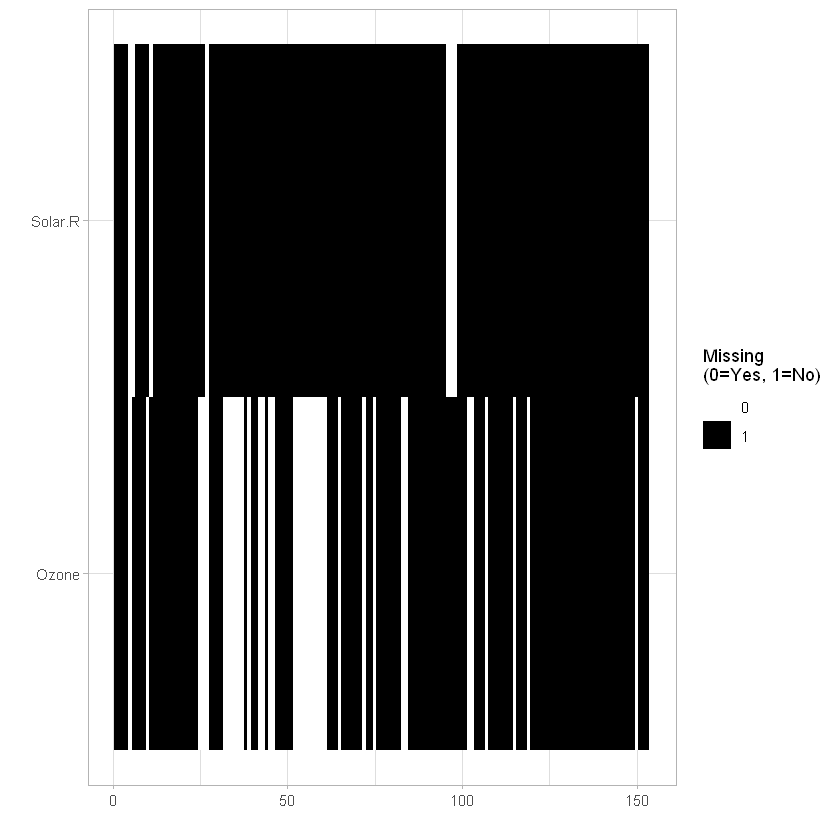

In [15]:
plot_Missing(df[,colSums(is.na(df))>0])

## 2. Imputation

### 2.1. Ozone의 결측치를 Ozone의 10번째로 큰 값으로 대체할 것.

In [16]:
o<-order(df$Ozone, decreasing=TRUE)
head(df[o,],10)

,Ozone,Solar.R,Wind,Temp,Month,Day
117,168,238,3.4,81,8,25
62,135,269,4.1,84,7,1
99,122,255,4.0,89,8,7
121,118,225,2.3,94,8,29
30,115,223,5.7,79,5,30
101,110,207,8.0,90,8,9
86,108,223,8.0,85,7,25
69,97,267,6.3,92,7,8
70,97,272,5.7,92,7,9
124,96,167,6.9,91,9,1


In [18]:
df<-df[o,]

In [22]:
df$Ozone<-ifelse(is.na(df$Ozone),df$Ozone[10], df$Ozone)

In [25]:
tail(df)

,Ozone,Solar.R,Wind,Temp,Month,Day
102,96,222,8.6,92,8,10
103,96,137,11.5,86,8,11
107,96,64,11.5,79,8,15
115,96,255,12.6,75,8,23
119,96,153,5.7,88,8,27
150,96,145,13.2,77,9,27


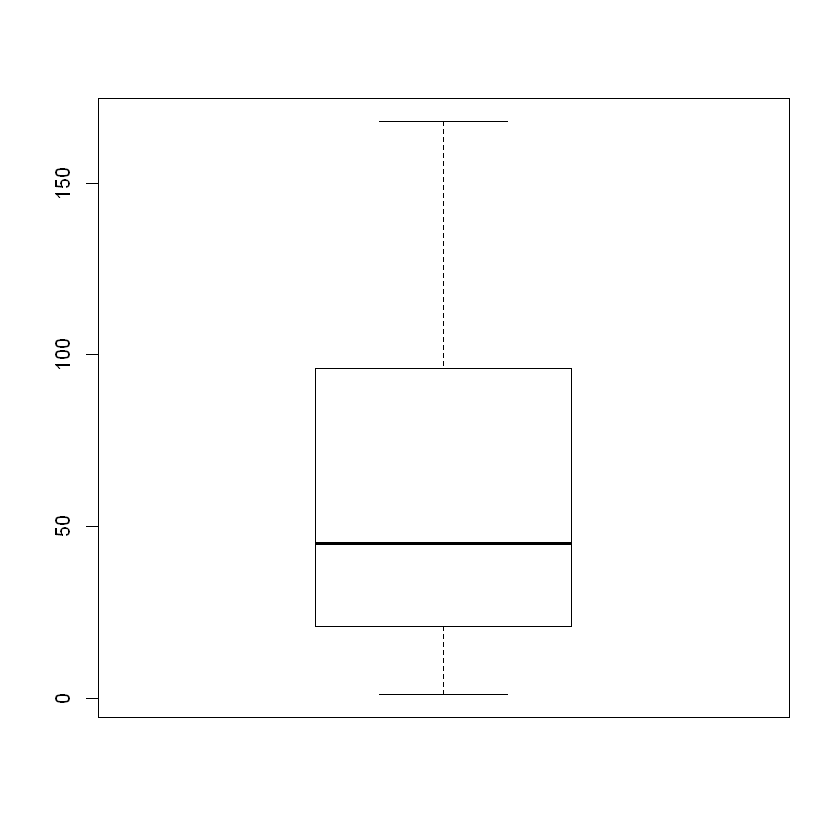

In [27]:
boxplot(df$Ozone)

- 이후 대체하기 이전의 Ozone의 평균값과 대체한 이후의 Ozone의 평균값의 차이 (절대값)를 구할 것.

In [29]:
#raw데이터 ozone 평균
m1<-mean(airquality$Ozone, na.rm=T) ; m1

[1] 42.12931

In [30]:
#imputation 이후 평균
m2<-mean(df$Ozone) ; m2

[1] 55.15686

In [33]:
abs(round(m1-m2,2))

[1] 13.03

### 2.2. Solar.R 의 결측치를 평균값으로 대체할 것.

In [35]:
df$Solar.R<-ifelse(is.na(df$Solar.R),mean(df$Solar.R, na.rm=T), df$Solar.R)

## 3. Scaling

### 3.1 Min-Max scaling
- 이후 Solar.R 변수와 Ozone 변수에 대해 min-max scaling을 진행할 것. (Min max scaling = normalization)

In [42]:
min_max_norm <- function(x) {
    (x - min(x)) / (max(x) - min(x))
  }

In [43]:
df_norm <- as.data.frame(lapply(df[1:2], min_max_norm))

In [44]:
head(df_norm)

Ozone,Solar.R
1.0000000,0.7064220
0.8023952,0.8012232
0.7245509,0.7584098
0.7005988,0.6666667
0.6826347,0.6605505
0.6526946,0.6116208


- 이후 Solar.R 변수의 최댓값과 Ozone.R 변수의 최솟값의 차이를 구할 것.

In [46]:
max(df_norm[1])-min(df_norm[2])

[1] 1